<a href="https://colab.research.google.com/github/Da-Seungheon/RFM_Data_Analysis/blob/main/02_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89_%EB%B0%8F_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터탐색 및 전처리

## 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/04_코드잇csv/customer_data.csv', sep='\t')
df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11


In [4]:
# 데이터 탐색하기
df.shape

(2240, 23)

In [8]:
# 컬럼들을 생략하지 않고 모두 보이게 설정
pd.set_option('display.max_columns', None)
df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [9]:
# annual_income 컬럼에 결측값이 포
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

In [11]:
df.describe(include='all')

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
count,2240.000000,2240,2240.000000,2.216000e+03,2240,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
unique,NaN,24,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12,NaN,NaN,배우자 있음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,NaN,1976.805804,6.792143e+07,NaN,0.950446,49.109375,3.951164e+05,34192.901786,2.170350e+05,48783.080357,35181.830357,57228.437500,4.084821,5.790179,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,11.0
std,3246.662198,NaN,11.984069,3.272500e+07,NaN,0.751803,28.962453,4.375766e+05,51705.463894,2.934300e+05,71017.673224,53664.648034,67817.670589,2.778714,3.250958,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.0
min,0.000000,NaN,1901.000000,2.249000e+06,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
25%,2828.250000,NaN,1967.000000,4.589390e+07,NaN,0.000000,24.000000,3.087500e+04,1300.000000,2.080000e+04,3900.000000,1300.000000,11700.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
50%,5458.500000,NaN,1978.000000,6.679595e+07,NaN,1.000000,49.000000,2.255500e+05,10400.000000,8.710000e+04,15600.000000,10400.000000,31200.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
75%,8427.750000,NaN,1985.000000,8.907860e+07,NaN,1.000000,74.000000,6.555250e+05,42900.000000,3.016000e+05,65000.000000,42900.000000,72800.000000,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0


In [13]:
# ob타입들만 변수에 따로 저장 후 어떤 값들이 있는지 확인해보자
co_ob = df.columns[df.dtypes == 'object']
co_ob

Index(['signup_ym', 'marital_status'], dtype='object')

In [14]:
# 반복문을 통해 unique한 값들을 확인하자
for col in co_ob:
    unique_values = sorted(df[col].unique())  # 컬럼의 유니크값을 정렬하고 변수에 저장
    print(f'{col}: {len(unique_values)}개')  #컬럼이름과 유니크 갯수 출력코드
    print(unique_values, '\n')  #컬럼의 유니크값 출력 코

signup_ym: 24개
['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'] 

marital_status: 4개
['미혼', '배우자 있음', '사별', '이혼'] 



In [16]:
# annual_income 컬럼 결측값 처리하기
df.isna().sum()

,0
ID,0
signup_ym,0
birth_year,0
annual_income,24
marital_status,0
children,0
recency,0
amount_alcohol,0
amount_fruit,0
amount_meat,0


In [17]:
# 다른 값으로 채워 넣을 수 있ㅉ미나 24개 데이터에는 전체 데이터의 1%도 수준이니 바로 삭제하자
df = df.dropna()
df.isna().sum()

,0
ID,0
signup_ym,0
birth_year,0
annual_income,0
marital_status,0
children,0
recency,0
amount_alcohol,0
amount_fruit,0
amount_meat,0


## 데이터 가공

In [18]:
# 먼저 고객의 출생년도를 조금 더 직관적인 값이 나이로 변경해보자
# 2023년 1월이 기준 시점이므로 2023년에서 birth_year 컬럼을 뺀 나이를 구하고 기존 컬럼에 저장하자
df['birth_year'] = 2023 - df['birth_year']

<ipython-input-18-2e5c31268a62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'] = 2023 - df['birth_year']


In [20]:
# 컬럼이름을 age로 변경하자
df = df.rename(columns={'birth_year' : 'age'})
df.head(1)

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11


## 구매 금액 합계 구하기

In [24]:
#amount 컬럼은 각각의 품목별 구매 금액을 나타내고 있으니 다 더한 값을 새로운 변수에 저장하자
data_amount_total = (
    df['amount_alcohol']
    + df['amount_fruit']
    + df['amount_meat']
    + df['amount_fish']
    + df['amount_snack']
    + df['amount_general']
)


In [25]:
# 컬럼 이름 변경하자
df['amount_total'] = data_amount_total

In [28]:
# 합계를 나타내는 컬럼의 위치를 변경하자
# 넣고자 하는 컬럼의 옆 컬럼의 번호를 확인하자
index_amount_general = df.columns.get_loc('amount_general')
index_amount_general

12

In [37]:
# 위치를 알았으니 원하는 자리에 컬럼을 삽입하자
df.insert(
    loc=index_amount_general + 1,  # amount_general 컬럼 옆이니 +1
    column='amount_total',  # 내가 넣고자 하는 컬럼의 이름
    value=data_amount_total,  # 컬름의 데이터
)
df.head()


,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,0,0,0,0,0,0,11


### 구매 횟수 구하기

In [39]:
num_purchase_total = (
    df['num_purchase_web']
    + df['num_purchase_store']
    + df['num_purchase_discount']
)

index_num_purchase_discount = df.columns.get_loc('num_purchase_discount')
df.insert(
    loc=index_num_purchase_discount + 1,
    column='num_purchase_total',
    value=num_purchase_total,
)
df.head()


,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,11


## 불필요한 컬럼 삭제

In [41]:
df = df.drop(columns='revenue')
df.head()


,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0


---

## 나이 분포 파악하기

In [42]:
!pip install koreanize_matplotlib

%config lineBackendin.figure_format = 'retina'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 74.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

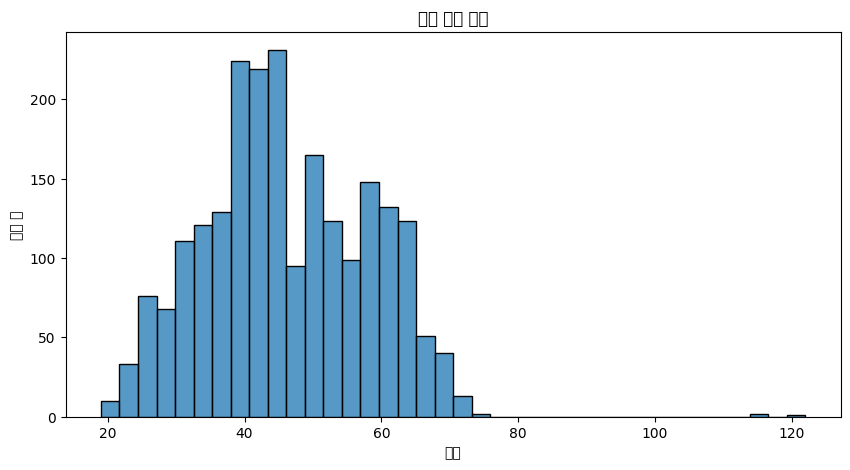

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df['age'])
plt.title('고객 분포 나이')
plt.xlabel('나이')
plt.ylabel('고객 수')
plt.show()

In [51]:
# 나이컬럼 내림차순으로 정렬
df.sort_values(by='age', ascending=False)

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
239,11004,2022-08,122,78236600.0,미혼,1,23,10400,0,6500,9100,0,2600,28600,1,2,1,4,0,0,0,0,0,0
339,1150,2021-12,116,108591600.0,배우자 있음,0,36,981500,187200,730600,135200,83200,291200,2408900,4,4,1,9,0,0,0,0,1,0
192,7829,2021-12,115,47632000.0,이혼,1,99,19500,7800,10400,9100,5200,32500,84500,2,2,1,5,0,0,0,0,0,0
1950,6663,2021-10,75,66483300.0,미혼,0,96,187200,0,9100,0,0,7800,204100,3,4,1,8,0,0,0,0,0,0
424,6932,2021-07,74,120935100.0,배우자 있음,0,77,1670500,54600,930800,71500,0,27300,2754700,7,5,0,12,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,4427,2020-12,20,108234100.0,미혼,0,56,696800,35100,767000,49400,139100,87100,1774500,5,12,1,18,0,0,1,0,1,1
995,5184,2022-06,20,45271200.0,미혼,0,65,5200,2600,14300,2600,0,5200,29900,1,2,1,4,0,0,0,0,0,0
747,10548,2022-06,20,92511900.0,미혼,0,30,367900,22100,483600,179400,137800,57200,1248000,3,12,1,16,0,0,0,0,0,0
1170,193,2022-05,19,18747300.0,배우자 있음,0,81,0,0,2600,3900,3900,10400,20800,1,2,1,4,0,0,1,0,0,0


In [53]:
# 100세 이상은 이상값으로 처리하자
df = df[df['age'] < 100]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

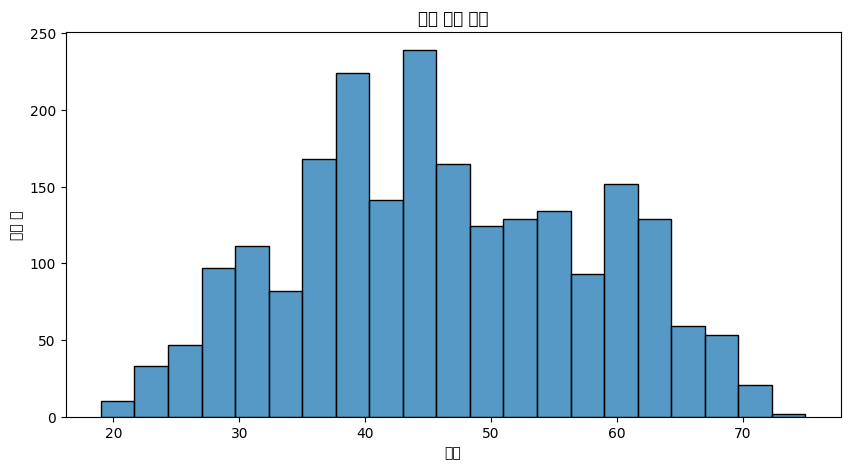

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df['age'])
plt.title('고객 분포 나이')
plt.xlabel('나이')
plt.ylabel('고객 수')
plt.show()

###지금의 age 컬럼은 고객의 나이가 담긴 정수형 데이터인데요. 19세부터 75세까지 워낙 다양하게 분포되어 있어 개별 나이를 기준으로 고객을 분석하기는 어렵습니다.
###나이를 10년 단위로 묶어 연령대 데이터로 바꿔 주면 각 연령대마다 경향이나 특성을 파악하고 분석하기 쉬워질 거예요. 이렇게 연속적인 데이터를 특정 구간으로 나누어 범주형 데이터로 바꾸는 과정을 데이터 구간화(Binning)라고 합니다.
###데이터를 구간화할 때 자주 사용되는 함수로는 cut()이 있어요. cut() 함수를 이용하면 사용자가 지정한 구간대로 데이터를 나눌 수 있죠.

###현재 데이터에는 고객 나이가 19세부터 75세까지 분포되어 있으니 연령대는 10대부터 70대까지 존재할 겁니다. 이때 10대는 10세 이상 20세 미만, 20대는 20세 이상 30세 미만, 그리고 70대는 70세 이상 80세 미만을 뜻하고요.
###이렇게 나눈 구간을 리스트로 표현하여 age_bins라는 변수에 먼저 넣어 주겠습니다

In [64]:
age_bins = list(range(10, 81, 10))
age_bins

[10, 20, 30, 40, 50, 60, 70, 80]

In [65]:
age_labels = [f'{x}대' for x in age_bins[:-1] ]
age_labels

['10대', '20대', '30대', '40대', '50대', '60대', '70대']

In [66]:
#cut() 함수를 호출할 때에는 x 파라미터에 구간화할 데이터를,
#bins 파라미터에 구간을 나타내는 리스트를,
#labels 파라미터에 구간 이름을 나타내는 리스트를 전달합니다.
#마지막으로 right 파라미터가 있는데요. 구간의 오른쪽 값을 포함할지 안 할지를 의미합니다.
#연령대 구간을 나눌 때 왼쪽 값 '이상', 오른쪽 값 '미만'으로 경계를 정했으니 오른쪽 값이 포함되면 안 되겠죠.
#즉 False를 전달해 주면 됩니다.
age_group = pd.cut(x=df['age'], bins=age_bins, labels=age_labels, right=False)

In [67]:
df.insert(
    loc=df.columns.get_loc('age') + 1,
    column='age_group',
    value=age_group,
)
df.head()


,ID,signup_ym,age,age_group,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,5524,2020-12,58,50대,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1
1,2174,2022-06,61,60대,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0
2,4141,2021-11,50,50대,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0
3,6182,2022-05,31,30대,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0
4,5324,2022-04,34,30대,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0


In [68]:
df['age_group'].value_counts()

,count
age_group,
40대,678
30대,502
50대,485
60대,338
20대,185
70대,23
10대,2


###아무래도 10대와 70대의 숫자가 너무 적은 것 같네요.
###이렇게 특정 연령대에서 표본의 수가 너무 적으면 해당 연령대에 대한 통계 수치의 신뢰성이 떨어지고 분석 결과 역시 왜곡되기 쉽습니다.
###그래서 10대와 20대를 20대 이하로, 60대와 70대를 60대 이상으로 바꾸어 연령대 값을 새롭게 구해 줄게요.

In [69]:
age_group_replace_dict = {
    '10대': '20대 이하',
    '20대': '20대 이하',
    '60대': '60대 이상',
    '70대': '60대 이상',
}
df['age_group'] = df['age_group'].replace(age_group_replace_dict)


<ipython-input-69-7ed4acc9c646>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['age_group'] = df['age_group'].replace(age_group_replace_dict)


In [71]:
df['age_group'].value_counts()

,count
age_group,
40대,678
30대,502
50대,485
60대 이상,361
20대 이하,187


---

### 연 소득 분포 파악하기

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

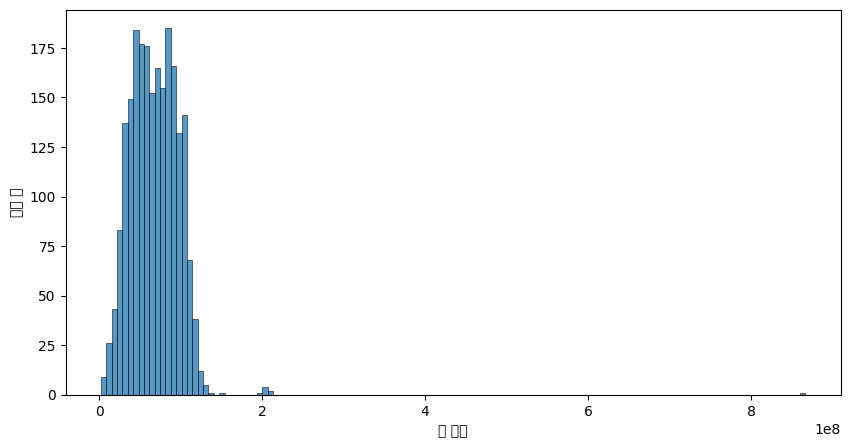

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df['annual_income'])
plt.xlabel('연 소득')
plt.ylabel('고객 수')
plt.show()

###그래프를 보니 연 소득에도 이상값이 존재하는 것 같은데요. 박스 플롯을 그려서 다시 확인해 보겠습니다. 간단히 이상값 존재를 확인하기 위해서이니 별다른 설정은 하지 않을게요.

<Axes: xlabel='annual_income'>

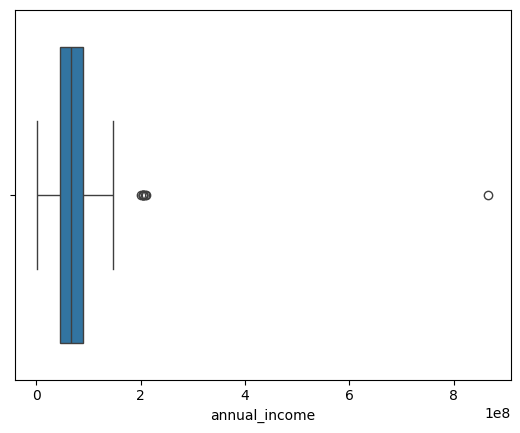

In [74]:
sns.boxplot(data=df, x='annual_income')

###역시 연 소득이 높은 쪽에 이상값으로 분류된 데이터가 몇 개 존재하네요.
###나이가 110세를 넘는 고객이 존재하는 건 생물학적으로 불가능에 가깝지만,
###연 소득이 다른 사람들에 비해 높은 고객은 충분히 존재할 수 있겠죠.
###결국 연 소득 이상값이 오류 때문에 생긴 건지 실제 값인지 이 데이터만으로는 알 수 없습니다.
###다만 소득이 예외적으로 높은 고객이 있을 시 소득과 소비 사이의 관계를 분석할 때 왜곡이 발생할 수 있고,
###연 소득이 이상 범위에 있는 고객의 수가 많지 않으니 그냥 제거해 줄게요.

In [75]:
income = df['annual_income']
q1 = income.quantile(0.25)
q3 = income.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

normal_condition = (lower_bound <= income) & (income <= upper_bound)
df = df[normal_condition]


<Axes: xlabel='annual_income'>

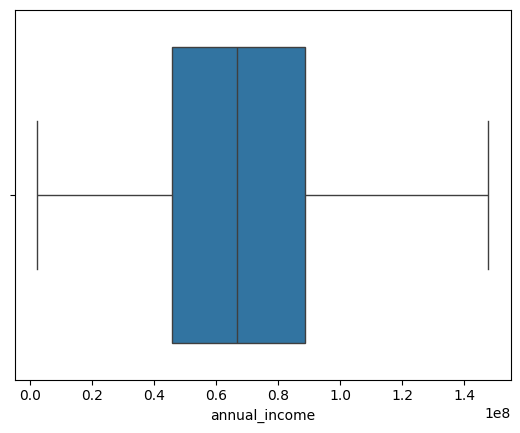

In [76]:
sns.boxplot(data=df, x='annual_income')
